In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

def read_folder(folder):
    results_full = [x for x in os.listdir(folder) if "metrics" in x][0]
    results_full = os.path.join(folder, results_full)
    with open(results_full, 'r') as f:
        results_full = json.load(f)
    return results_full

FPRATES = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]

In [2]:
folders = [os.path.join("MaskedLanguageModeling", x) for x in os.listdir("MaskedLanguageModeling") if "uSize" in x and not "log" in x]
results = {}
for folder in folders:
    size = folder.split("_")[-2]
    results[size] = read_folder(folder)
results = {k:results[k] for k in sorted(results.keys())}

In [3]:
def plot_gradation(value_pretrained, values_non_pretrained, full):
    # (keys, split_values) --> (keys,)
    pretrained_mean = np.array(value_pretrained).mean(axis=1)
    pretrained_std = np.array(value_pretrained).std(axis=1)
    non_pretrained_mean = np.array(values_non_pretrained).mean(axis=1)
    non_pretrained_std = np.array(values_non_pretrained).std(axis=1)
    full_mean = np.array(full).mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(results.keys(), pretrained_mean, yerr=pretrained_std, label="Pretrained", capsize=3)
    ax.scatter(results.keys(), pretrained_mean)
    ax.errorbar(results.keys(), non_pretrained_mean, yerr=non_pretrained_std, label="Non-pretrained", capsize=3)
    ax.scatter(results.keys(), non_pretrained_mean)
    ax.plot(results.keys(), full_mean*np.ones(len(results.keys())), label="Full data", linestyle="--")

    ax.grid()
    ax.legend()
    return ax

Text(0.5, 1.0, 'AUC')

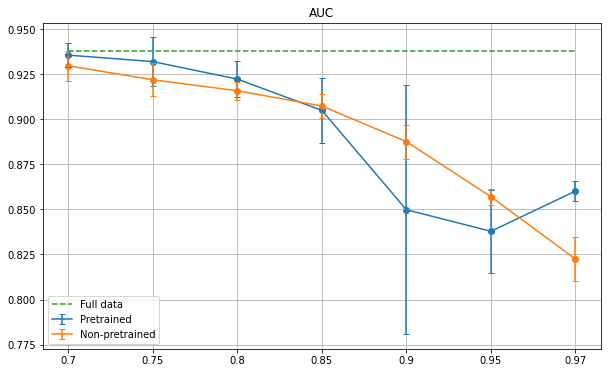

In [4]:
auc_full = np.array([results[x]['full_data']['auc'] for x in results.keys()])

value_pretrained = [results[x]['pretrained']['auc'] for x in results]
values_non_pretrained = [results[x]['non_pretrained']['auc'] for x in results]

ax = plot_gradation(value_pretrained, values_non_pretrained, auc_full)
ax.set_title("AUC")

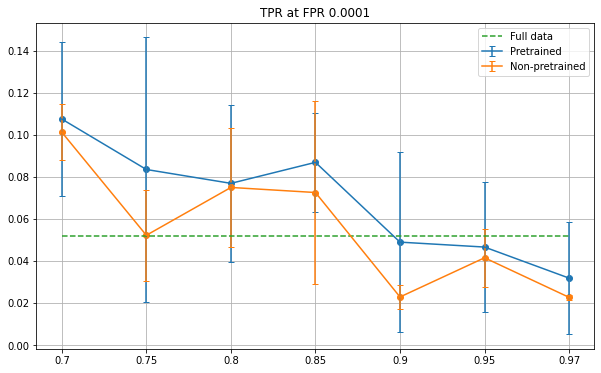

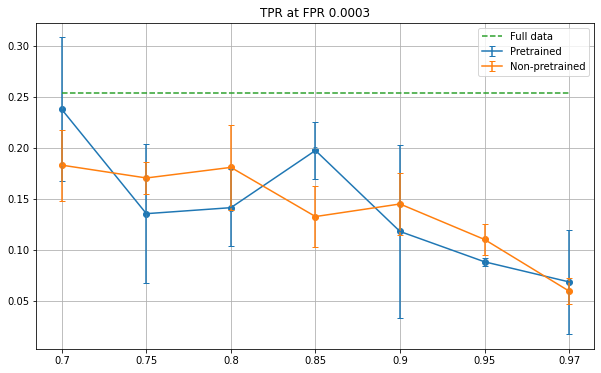

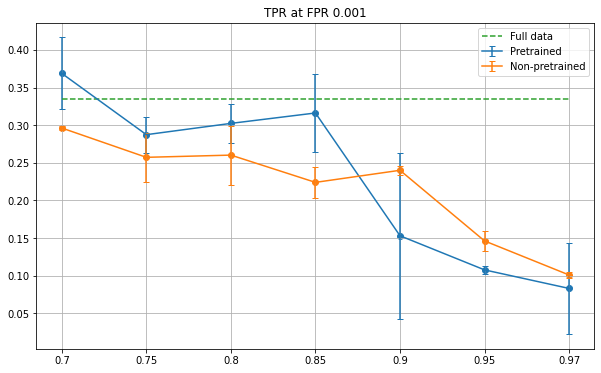

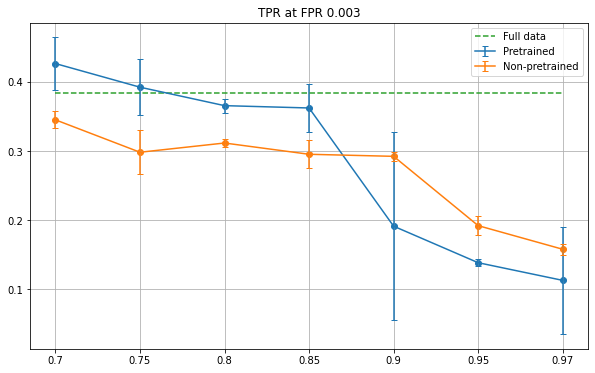

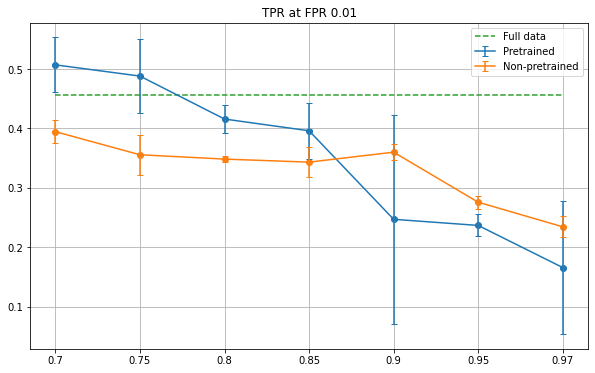

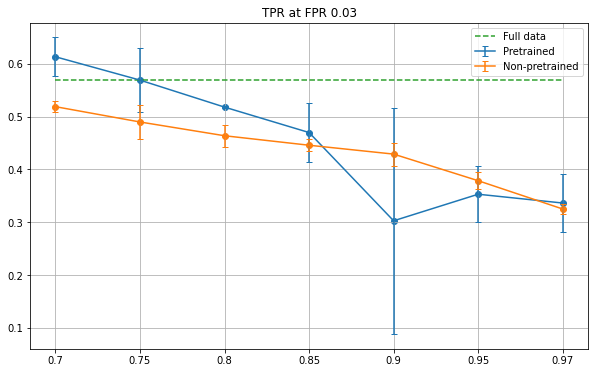

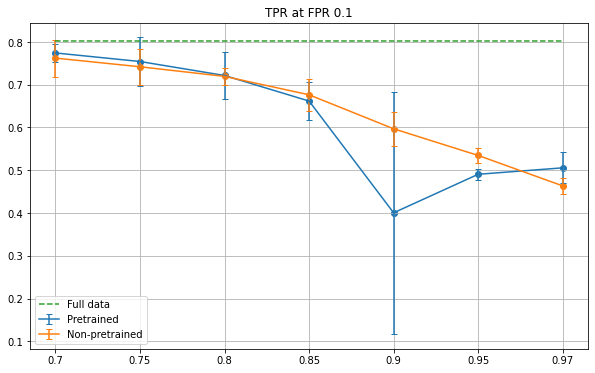

In [5]:
for fpr in FPRATES:
    pr = [results[x]['pretrained'][f'fpr_{fpr}']['tpr'] for x in results]
    nonpr = [results[x]['non_pretrained'][f'fpr_{fpr}']['tpr'] for x in results]
    full = [results[x]['full_data'][f'fpr_{fpr}']['tpr'] for x in results]
    ax = plot_gradation(pr, nonpr, full)
    ax.set_title(f"TPR at FPR {fpr}")